In [96]:
# Analysis of DataSet : Hospitalized patients with heart failure

#pip install missingno # To be installed if its not installed already

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
import random
from datetime import datetime
#to see plot directly intead giving plt.show()
%matplotlib inline
%reload_ext autoreload



In [97]:
df_HospitalDischarge = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name ='Hospitalization_Discharge')


In [98]:
df_CardiacComplication = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'CardiacComplications')



In [99]:
df_Responsive = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Responsivenes')



In [100]:
df_PatientHistory = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'PatientHistory')



In [101]:
df_Labs = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Labs')



In [102]:
df_Demography = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Demography')




In [103]:
df_Patientprescription = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name = 'Patient_Precriptions')



In [104]:
#1. How many patients were registered in each unique occupation?

df_Demography.groupby(['occupation'])['inpatient_number'].nunique()

#Additional
#df_Demography['occupation'].unique()
#for column in df_Demography:unique_values=df_Demography['occupation'].unique()
          

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
Name: inpatient_number, dtype: int64

In [12]:
# Additional Code
#df_Demography.groupby(["occupation"])["inpatient_number"].count()

In [105]:
#9. Create any 2 2-D arrays and perform matrix multiplication.Display the resulting array

#creating first array

arr1=np.array([[1,2,],[3,4]])
print(arr1)
print(arr1.ndim)

#creating second array

arr2=np.array([[5,6],[7,8]])
print(arr2)
print(arr2.ndim)

#Matrix Multiplying two arrays
print("Output:")
arr1=np.array([[1,2,],[3,4]])
arr2=np.array([[5,6],[7,8]])
arr=np.dot(arr1,arr2)
print(arr)

[[1 2]
 [3 4]]
2
[[5 6]
 [7 8]]
2
Output:
[[19 22]
 [43 50]]


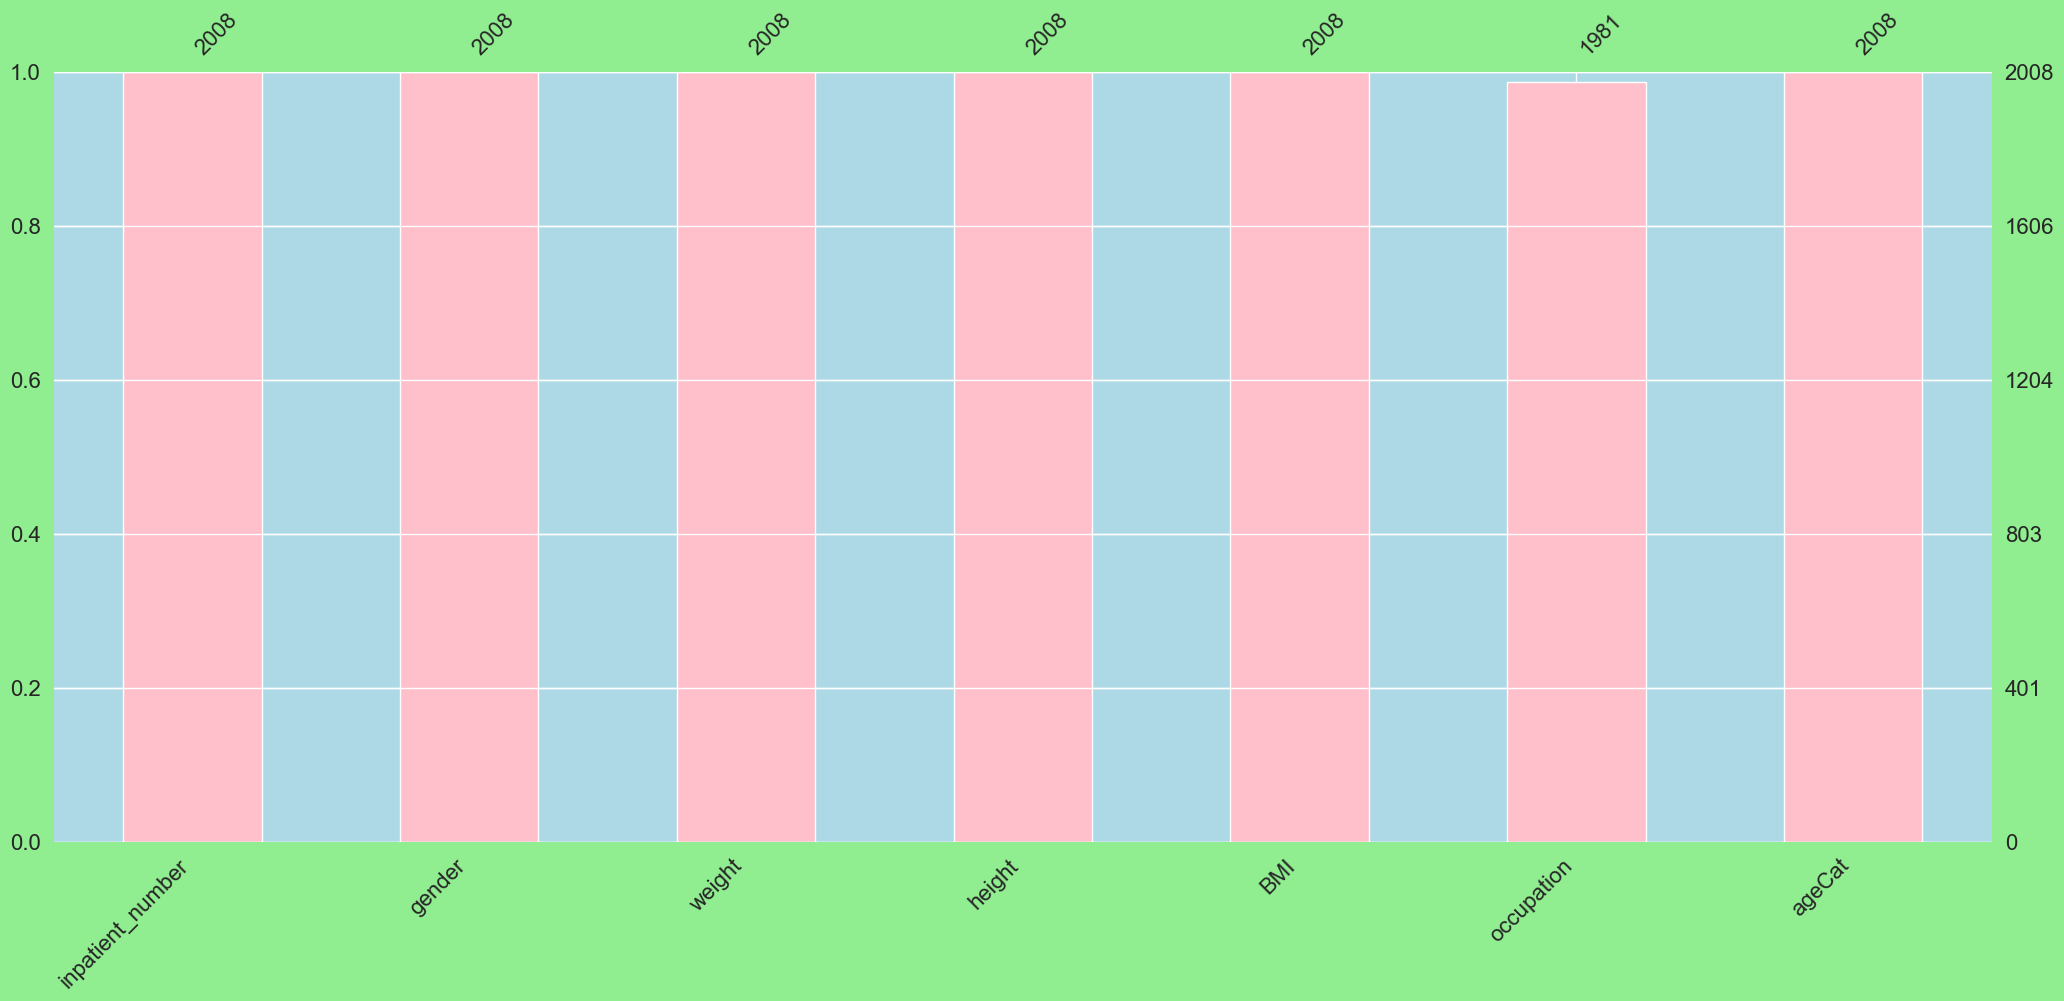

<Figure size 800x500 with 0 Axes>

In [107]:
#7. Visualize missing data and missing patterns from demography table using the "Missing No" Library

import random
colors_list = ["green","yellow","black","darkblue","pink"]
msno.bar(df_Demography, color = random.choice(colors_list))
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'lightblue','figure.facecolor':'lightgreen'})




In [109]:
#5. What is the ratio of patients who were responsive to pain vs responsive to sound?


import math
df_Responsive['GCS']
sound_Count = df_Responsive['consciousness'].value_counts()['ResponsiveToSound']
pain_Count = df_Responsive['consciousness'].value_counts()['ResponsiveToPain']
divisor = math.gcd(pain_Count, sound_Count)

print('Ratio')
Ratio=print(f"{round(pain_Count/divisor)}:{round(sound_Count/divisor)}")


Ratio
4:19


In [110]:
#11. To find valid phone no or not

import re
mobile_arr = ['2','9587456281','1252478965','7397260044']
pattern = re.compile(r"^[789]\d{9}")
for number in mobile_arr:
   matched = bool(re.search(pattern, number))
   if matched:
    print(number, "YES")
   else:
    print(number, "NO")


2 NO
9587456281 YES
1252478965 NO
7397260044 YES


In [111]:
#14. Find the list of patients whose discharge day is greater than the value given by the user.

userInputDays = int(input("Provide discharge days"))

discharge_day_array = df_HD[df_HD['dischargeDay'] > userInputDays]
discharge_day_array[['inpatient_number','dischargeDay']]

Provide discharge days 40


,inpatient_number,dischargeDay
108,796520,50
180,844447,41
183,775922,54
442,759764,54
470,811749,62
484,770068,62
509,734664,41
579,782110,64
811,737251,57
884,794077,123


In [112]:
#Q4. What percentage of patients had biventricular heart failure?

bi_failure_count = df_CardiacComplication['type_of_heart_failure'].value_counts()['Both']
total_count = df_CardiacComplication['type_of_heart_failure'].count()
print("Percentage of Biventricular heart failures: ", round((bi_failure_count/total_count) * 100, 2))


Percentage of Biventricular heart failures:  73.71


In [113]:
#Q12. If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

df_CardiacComplication_copy = df_CardiacComplication.copy()
total_patients = df_CardiacComplication['inpatient_number'].count()
patients_inside_range = df_CardiacComplication[df_CardiacComplication['left_ventricular_end_diastolic_diameter_LV'].between(3.5, 5.6)]
#Find patients outside range
df_CardiacComplication_copy[~df_CardiacComplication_copy.apply(tuple,1).isin(patients_inside_range.apply(tuple,1))]

print("Total patients outside range of 3.5 and 5.6: ", df_CardiacComplication_copy['inpatient_number'].count())
#merge CardiacComplication with labs data for matching patients outside range
df_CardiacComplication_labs_merge = df_CardiacComplication_copy.merge(df_labs, how = 'inner', on = 'inpatient_number')
#aggregate map value and find value for most patients 
df_map_count = df_CardiacComplication_labs_merge.groupby(['map'])['map'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(1)
print("MAP of most patients with this condition is:", df_map_count['map'].to_string(index=False))


Total patients outside range of 3.5 and 5.6:  2008
MAP of most patients with this condition is: 96.666667


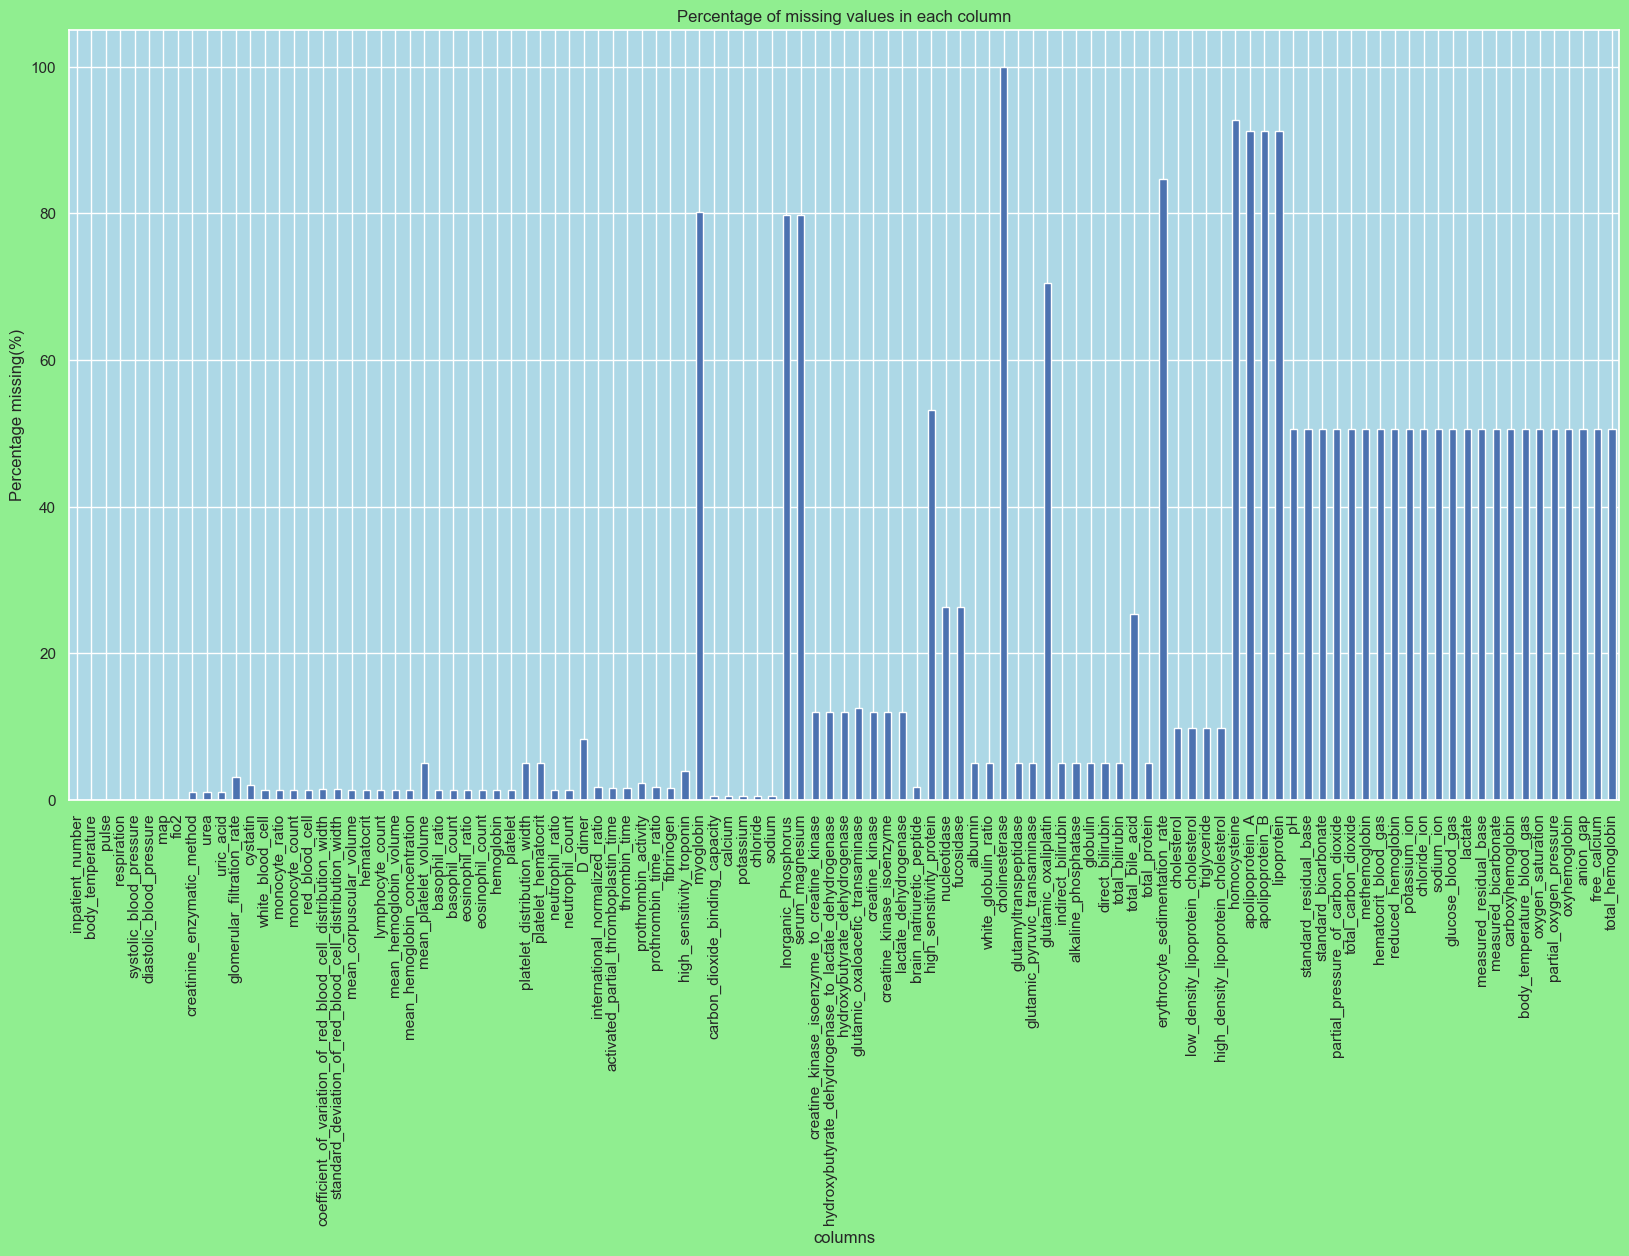

In [114]:
# Q10. Display percentage of missing values in each column in the table labs. show the distribution as a bar graph

missing_values_percentages=df_Labs.isnull().mean()*100
plt.figure(figsize=(20,10))
missing_values_percentages.plot(kind='bar')
plt.title('Percentage of missing values in each column')
plt.xlabel('columns')
plt.ylabel('Percentage missing(%)')
plt.show()
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'lightpink','figure.facecolor':'lightblue'})